# Social Network Analysis Example

Hello! My name is Brandon Wolfe. I am an applicant for the position of Data Engineer for the Tucson Police department. By way of introducing myself, I put together a little example of network analysis, using the python package NetworkX.

I will load in a popular dataset for network analysis, a real-world list of facebook friends (1). Each individual in the dataset is represented by a number, and is a node in the network representation. The dataset consists of more than 4,000 individuals with 88,000 pairs of friends. In the network, each pair is represented by a line (or edge) connecting two people.

To create this example, I referred to an article (2) on using network analysis to disrupt criminal networks, as well as the documentation for NetworkX.

Let's get started!

(1) J. McAuley and J. Leskovec. Learning to Discover Social Circles in Ego Networks. NIPS, 2012.\
(2) M. Fabien. Disrupting resilient criminal networks through data analysis. (2020, April 5). https://maelfabien.github.io/machinelearning/sicilian/# 

# To start, let's load in the networkx package and some helpful visualization tools.

In [2]:
import numpy as np
import pandas as pd
from random import randint

# Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import altair as alt

# Networks
import networkx as nx
#some community algorithms I tried
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import louvain_communities
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community import k_clique_communities

## Here, I load in the Stanford data.

As you can see, it has 88,234 pairs of friends. Find the dataset at:

https://snap.stanford.edu/data/ego-Facebook.html

In [3]:
facebook = pd.read_csv(
    "facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook

start_node  end_node
0               0         1
1               0         2
2               0         3
3               0         4
4               0         5
...           ...       ...
88229        4026      4030
88230        4027      4031
88231        4027      4032
88232        4027      4038
88233        4031      4038

[88234 rows x 2 columns]

## The variable 'G' is my graph for this example, and occurs throughout. Here I convert the data into the NetworkX format.

In [4]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

## Next, I visualize the graph using the NetworkX package. 

Each blue node represents an individual in the dataset, and each line represents a friendship.

The points are arranged in the *xy* plane using a `spring' algorithm:

1. Friendship bonds act like springs, pulling individuals closer together in this representation. This tends to clump people who share many friends into groups.
2. Nodes repel each other, which prevents nodes from falling all the way into each other in the graph.

Using these two forces, you let the nodes move around like a physics problem until they've settled down.

I will later save the *xy* representation of the nodes below as the variable 'pos'.

Text(0.5, 1.0, 'NetworkX Stanford Facebook Graph')

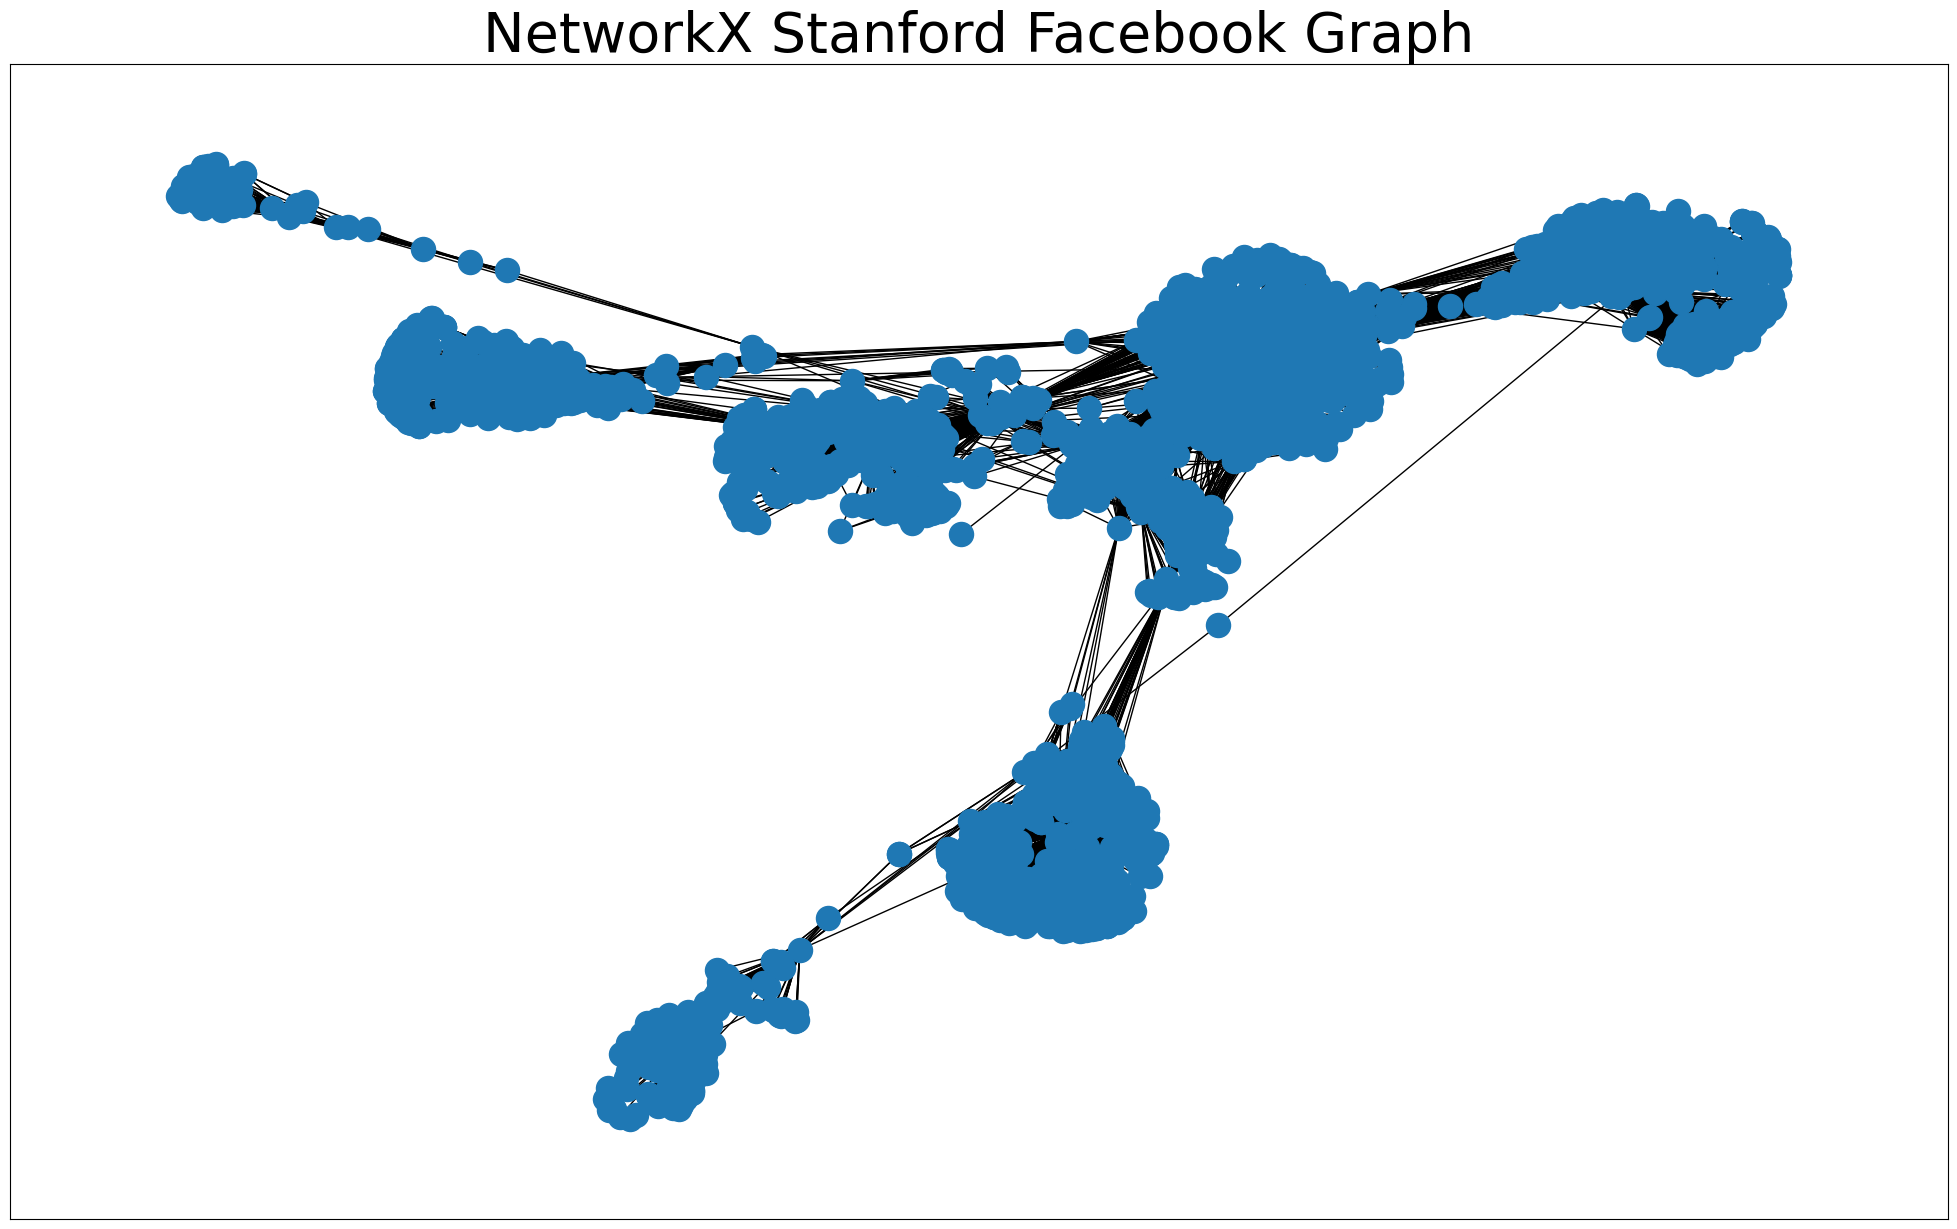

In [5]:
plt.figure(figsize =(25, 15))
nx.draw_networkx(G, with_labels = False)
plt.title('NetworkX Stanford Facebook Graph',fontsize=40)

# Some descriptive statistics

In [6]:
c_degree = nx.degree_centrality(G)
c_degree = list(c_degree.values())

nb_nodes = len(list(G.nodes()))
nb_edges = len(list(G.edges()))
degrees = list(dict(G.degree()).values())
avg_degree = np.mean(degrees)
median_degree = np.median(degrees)
max_degree = np.max(degrees)        
min_degree = np.min(degrees) 
avg_centrality = np.mean(c_degree) 
min_centrality = np.min(c_degree) 
max_centrality = np.max(c_degree) 
median_centrality = np.median(c_degree) 

print("Number of nodes: ", nb_nodes)
print("Number of edges: ", nb_edges)
print("Average degree: ", avg_degree)
print("Median degree: ", median_degree)
print("Max degree: ", max_degree)
print("Min degree: ", min_degree)
print("Average centrality: ", avg_centrality)
print("Median centrality: ", median_centrality)
print("Max centrality: ", max_centrality)
print("Min centrality: ", min_centrality)

Number of nodes:  4039
Number of edges:  88234
Average degree:  43.69101262688784
Median degree:  25.0
Max degree:  1045
Min degree:  1
Average centrality:  0.010819963503439287
Median centrality:  0.006191183754333828
Max centrality:  0.258791480931154
Min centrality:  0.00024764735017335313


There are 4,000 individuals in the dataset, with 88,234 friendships. The average number of friends is 44, and the largest number of friends is 1045.

Here, I have measured the connectedness of facebook users using the 'degree centrality', This is the percentage of users a particular individual is friends with. In this case, at least one user is friends with 26% of the entire dataset. On average, however, each user is friends with only 1% of the dataset. 

# The Distribution of Degrees

How many users have 10, 50, 500, or 1000 friends can tell us something about the structure of a network.

If facebook friends were related randomly, we might expect the distribution to be centered around some average number of friends. Most facebook users would have a similar number of friends, making the distriubtion relatively flat.

The plot below, however, is far from this description. It is roughly exponential, but has more individuals with a very large number of friends (far right) than a purely exponential distribution would predict (a so-called *long tail*). So, this degree distribution shows that we do not have a random network. An overwhelming number of people have less than 50 friends (note the logarithmic scale on the y-axis). A few (one or two) people have a huge amount of friends, 500 or more. These invididuals are known as influencers or hubs.

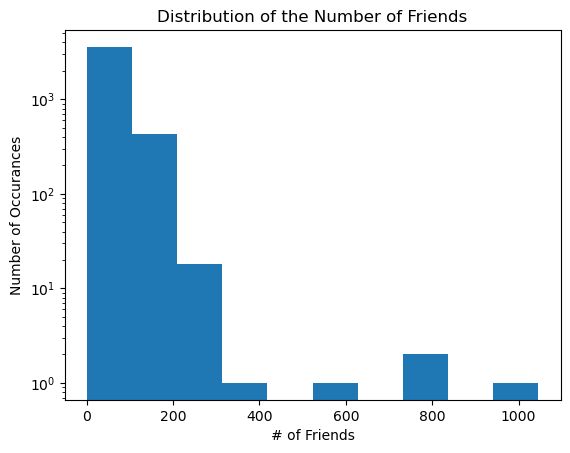

In [7]:
plt.subplot(111)
plt.hist(degrees)
plt.yscale('log')
plt.title('Distribution of the Number of Friends')
plt.xlabel('# of Friends')
plt.ylabel('Number of Occurances')
plt.show()

In [8]:
def draw(G, pos, measures, measure_name):
    
    mysize=list(measures.values())
    for i in range(len(mysize)):
        mysize[i] = 500*mysize[i]
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=mysize, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name,fontsize=40)
    cb=plt.colorbar(nodes)
    cb.set_label(label='Centrality Value',size=30)
    cb.ax.tick_params(labelsize=30)
    #plt.axis('off')
    plt.show()

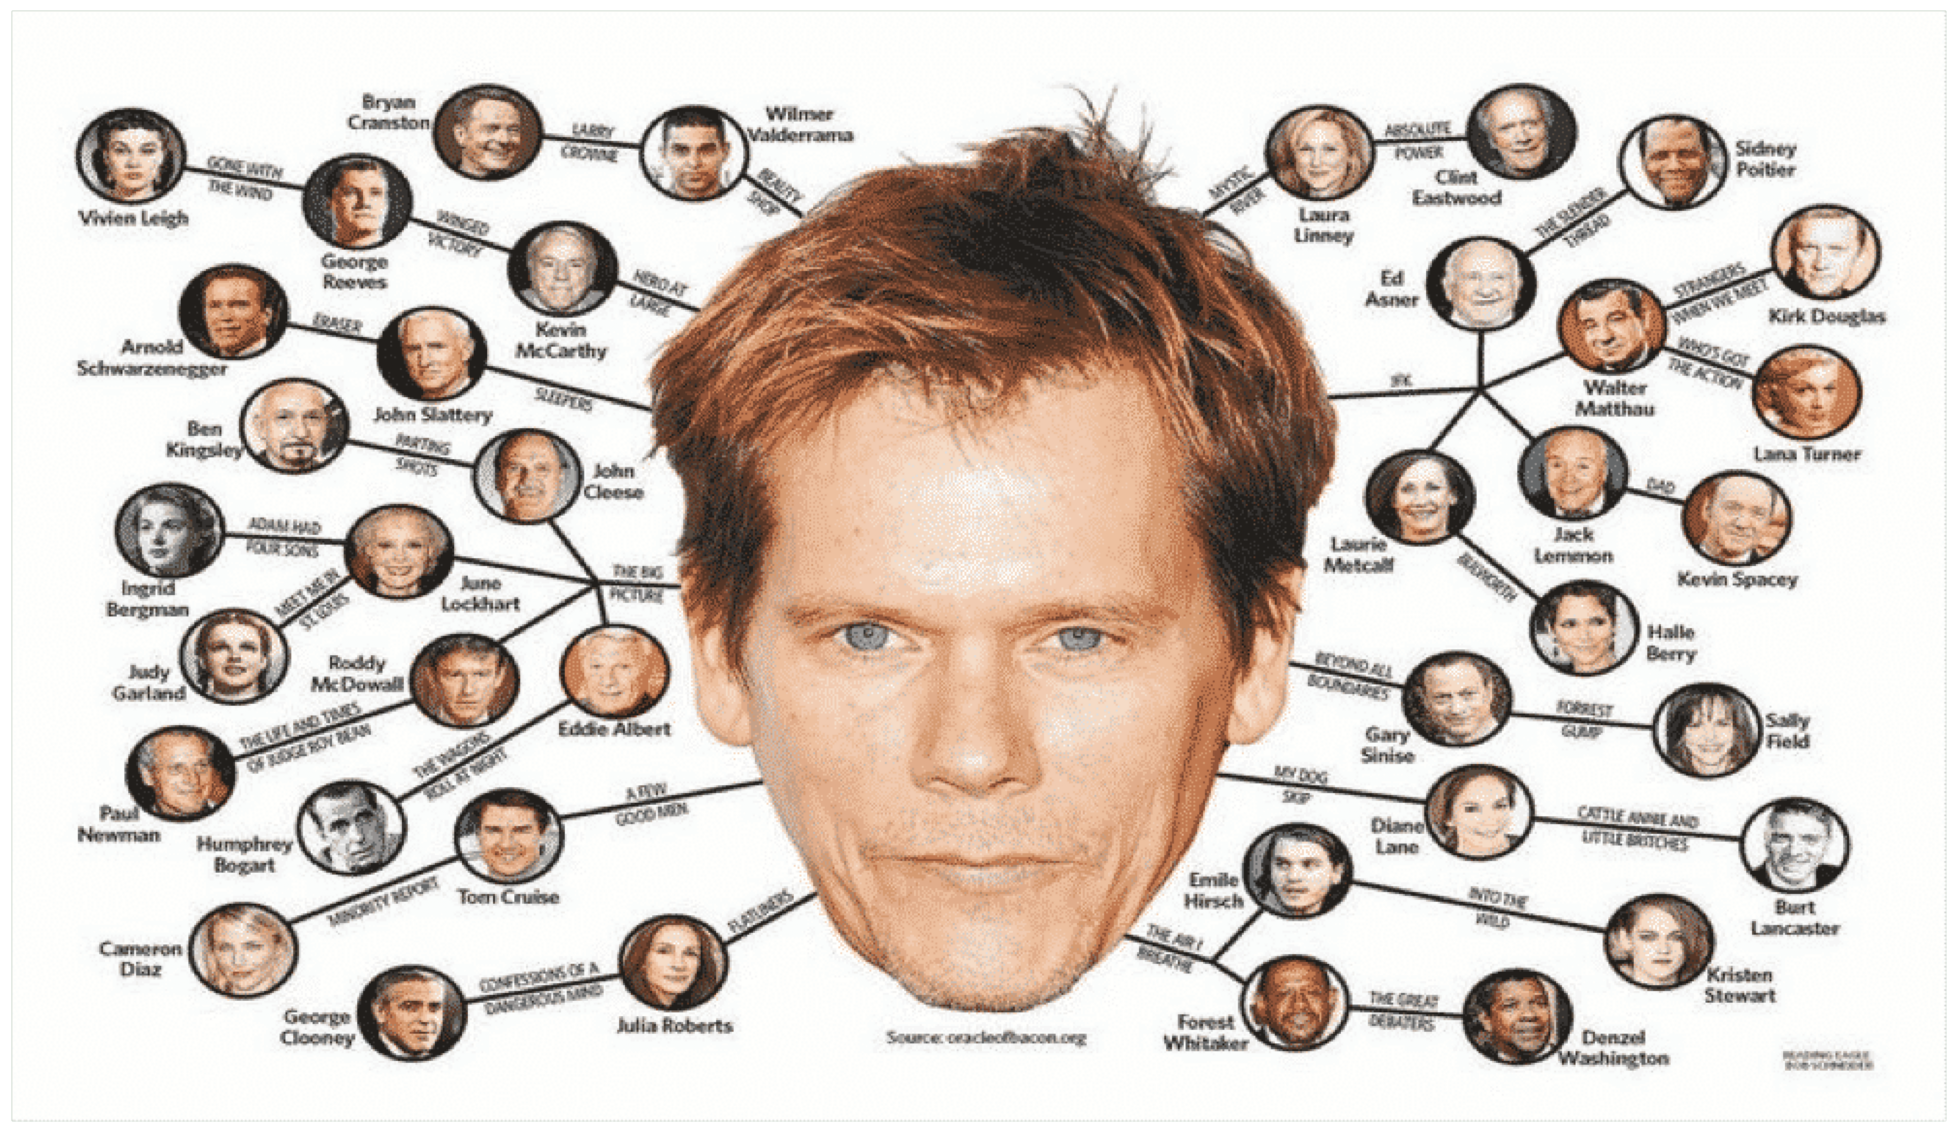

In [27]:
from matplotlib import image as mpimg
fig=plt.figure(figsize =(25, 15))
image = mpimg.imread("kevin-bacon-7656918.png")
plt.imshow(image)
plt.axis('off')
plt.show()

# How to disrupt a social network?

McAuley and Leskovec (1) suggest that the network is best disrupted by eliminating actors with the highest 'betweenness centrality' (BC). This measurement works like the game 'seven degrees of Kevin Bacon':

1. Everyone in the network figures out how to trace their relationships to everyone else. For example, you might want to connect George Clooney to Forest Whittaker. In the image above, George Clooney is friends with Julia Roberts, who is friends with Kevin Bacon, who is friends with Forest Whittaker. 
2. For every pair of people in the network, compute the shortest path connecting the two. (This may or may not go through Kevin Bacon--e.g. in the graph above, Humphrey Bogart is related to John Cleese through Eddie Albert.) 
3. The person who appears in the most short paths is acting as a bridge relating people in the network. This is what betweenness centrality measures.

It makes sense that eliminating the person who binds the network together would disrupt it. Below, I calculate the BC for facebook friends, then plot it on top of the network. In this plot, both the color and the size of each node is given by the BC value. If you wanted to disrupt this network, you'd start with the large yellow node in the middle of the plot--they are our Kevin Bacon.

In [9]:
myq=nx.betweenness_centrality(G)
pos=nx.spring_layout(G)

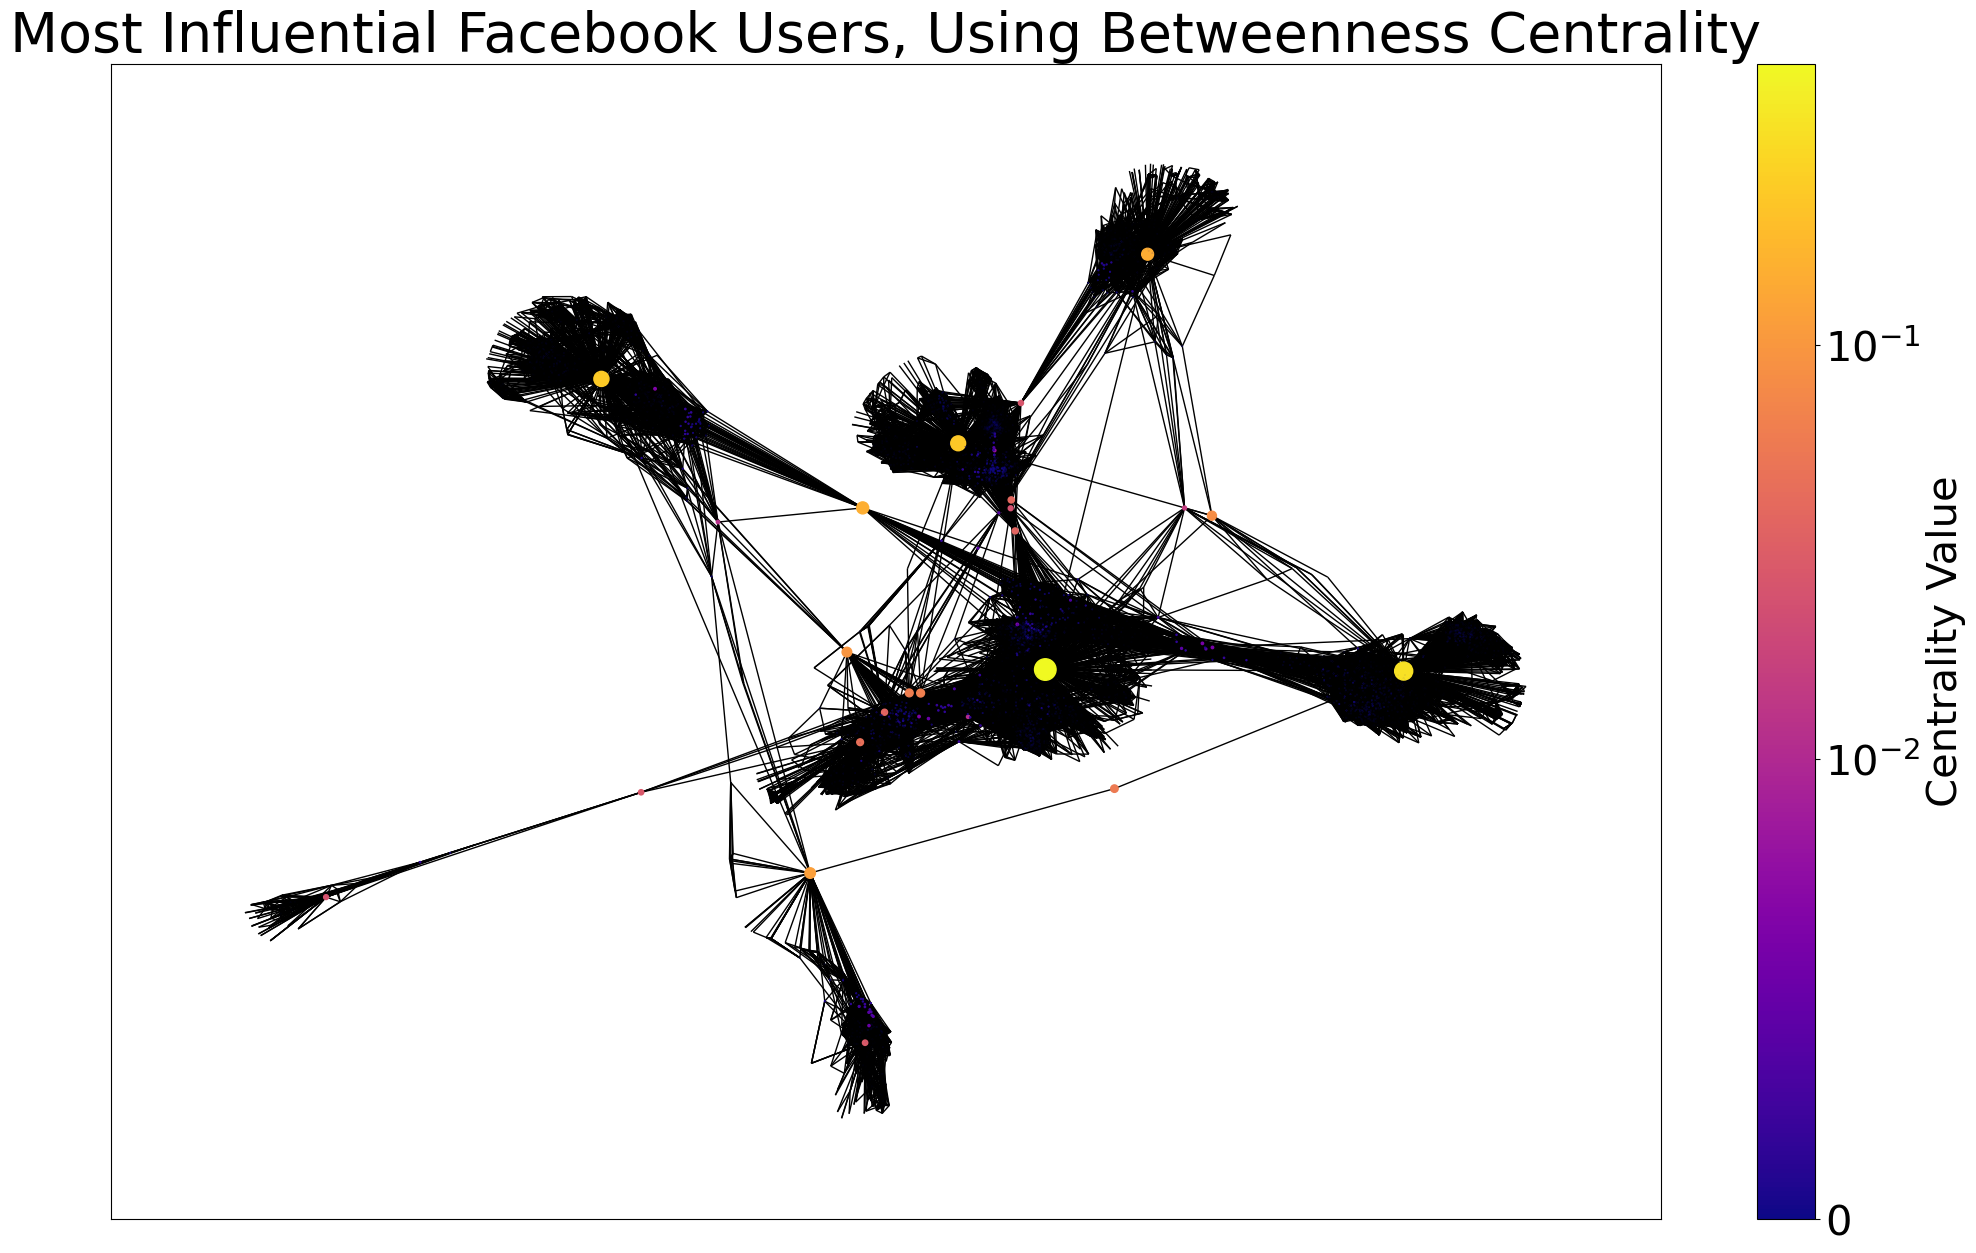

In [12]:
fig=plt.figure(figsize =(25, 15))
draw(G, pos, myq, 'Most Influential Facebook Users, Using Betweenness Centrality')
fig.tight_layout()

# How to identify communities or blocks of users?

One alternative to eliminating influential users in the network is to eliminate entire groups of related users. To identify these communities, I've used the label propagation method:

1. Every node is initialized with a label
2. As you loop through the nodes of the network, each node updates its label to the one that most of its neighbors belongs to. 
3. Repeat until none of the labels needs to be changed.

There are other methods of identifying communities, but this method matched well with the 'spring-force' algorithm used to plot the network.

In [13]:
colors = ["" for x in range(G.number_of_nodes())]  # initialize colors list
counter = 0
for com in nx.community.label_propagation_communities(G):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(
        com
    ):  # fill colors list with the particular color for the community nodes
        colors[node] = color
counter

44

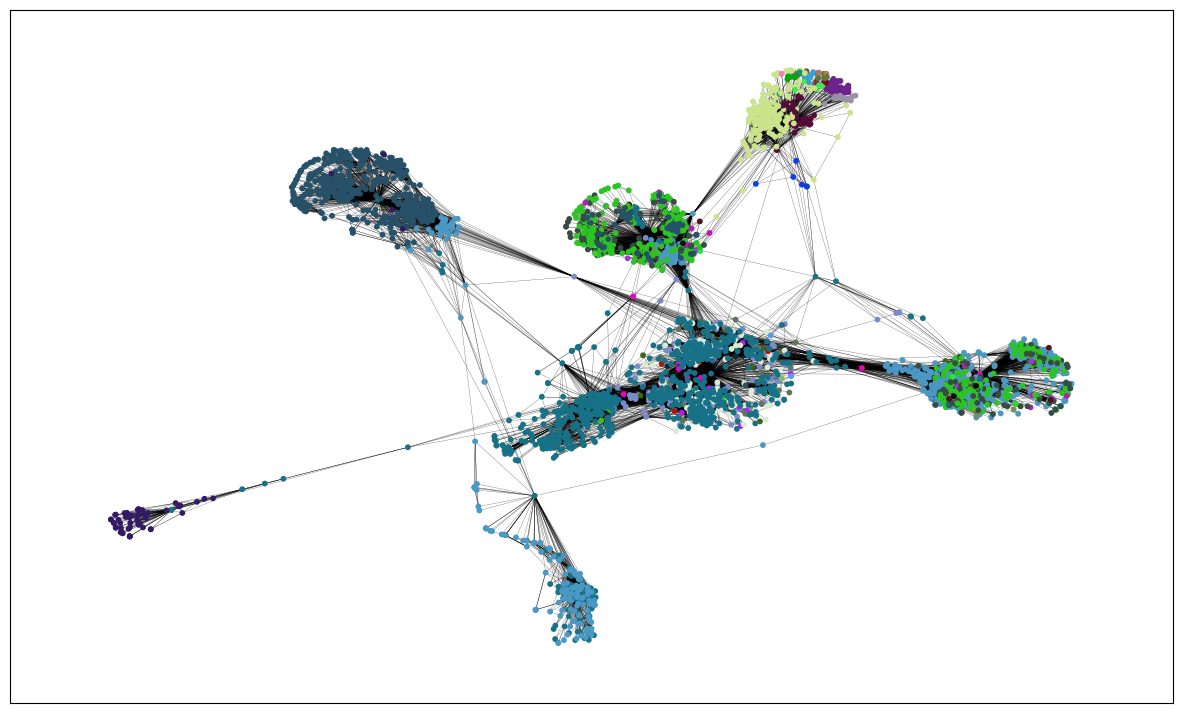

In [14]:
plt.figure(figsize=(15, 9))
    
nx.draw_networkx(G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors)

As you can see above, the algorithm identifies 44 different communities within the dataset. Each is represented by a different color. Presumably, each of the members of these communities share a suite of different attributes. So, for example, you could hope that the purple community in the far left consists of people who all shop at REI and not Bass Pro Shop. 

However, 44 communities is too large to display easily. My human neural network tells me there are roughly 7 communities in this representation of the data. Is there another way to do this?

# Using Clustering to Identify Communities

K-means and DBScan (Density Based Spatial Clustering of Applications with Noise)  are two of the most popular clustering algorithms in unsupervised machine learning.

1. K-Means Clustering : Divides data points into K nearby groups via their distance from center

Algorithm:

* Guess the position of K cluster centers
* Calculate the distance of each point from each center
* Each data point is assigned to its closest cluster center
* Using the now-labeled data, recalculate the actual cluster centers
    
2. DBScan Clustering : DBScan identifies a cluster center where it finds a high density of data points.

Algorithm:

* Each data point is assigned a label
    Core Point: A data point that is around a lot of other points
    Border Point: A data point that is not around a lot of points but is near a core point
    Outlier Point: A data point that is far from any a core point
* The outlier points are eliminated.
* Core points that are neighbors are connected and put in the same cluster.
* Border points are assigned to each cluster.

Here, I use t

In [15]:
X=np.array(list(pos.values()))

In [16]:
df=pd.DataFrame(X)

In [17]:
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [18]:
k_means=KMeans(n_clusters=7,random_state=42,n_init=10)
k_means.fit(df);

In [19]:
db = DBSCAN(eps=0.03, min_samples=10).fit(df)

In [20]:
colors=['purple','red','blue','green','orange','yellow','k']

Text(0, 0.5, 'Feature 2')

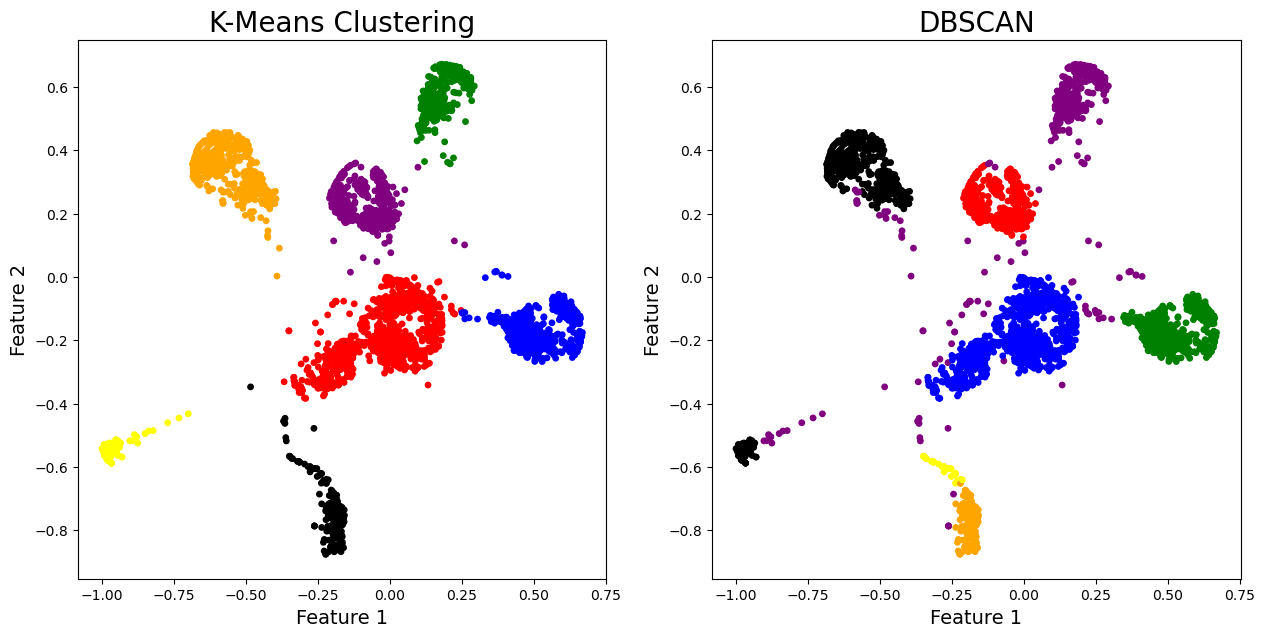

In [21]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,7))
#ax1.scatter(df[0],df[1],c=k_means.labels_,cmap=mcolors.ListedColormap(colors),s=15)
nx.draw_networkx(G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors)
ax1.set_title('K-Means Clustering',fontsize=20)
ax1.set_xlabel('Feature 1',fontsize=14)
ax1.set_ylabel('Feature 2',fontsize=14)

ax2.scatter(df[0],df[1],c=db.labels_,cmap=mcolors.ListedColormap(colors),s=15)
ax2.set_title('DBSCAN',fontsize=20)
ax2.set_xlabel('Feature 1',fontsize=14)
ax2.set_ylabel('Feature 2',fontsize=14)